In [42]:
from vehicle import Vehicle
from scipy.optimize import fsolve as josie_solver
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

0.1002840377928111

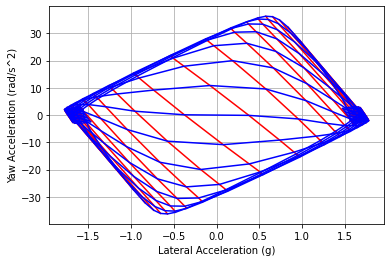

In [43]:
df = pd.read_csv("MMM_inc_angle_test.csv")

for x in df["body_slip"].unique():
    df2 = df[df["body_slip"] == x]
    plt.plot(df2["y_double_dot"]/9.81, df2["yaw_acceleration"], 'r')
    #plt.text(list(df2["y_double_dot"])[-1]/9.81, list(df2["yaw_acceleration"])[-1], f'sample {x}')

for x in df["steered_angle"].unique():
    df2 = df[(df["steered_angle"] == x)]
    plt.plot(df2["y_double_dot"]/9.81, df2["yaw_acceleration"], 'b')
plt.grid()
plt.ylabel("Yaw Acceleration (rad/s^2)")
plt.xlabel("Lateral Acceleration (g)")

abs(df["yaw_acceleration"]).min()

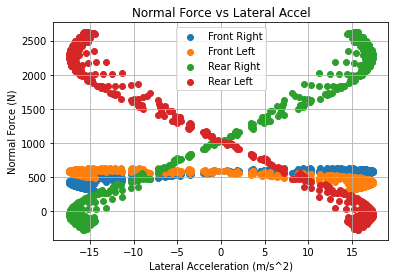

In [44]:
import math
plt.scatter(df["y_double_dot"], df["front_left_tire_centric_forces_2"], label = "Front Right")
plt.scatter(df["y_double_dot"], df["front_right_tire_centric_forces_2"], label = "Front Left")
plt.scatter(df["y_double_dot"], df["rear_left_tire_centric_forces_2"], label = "Rear Right")
plt.scatter(df["y_double_dot"], df["rear_right_tire_centric_forces_2"], label = "Rear Left")
plt.title("Normal Force vs Lateral Accel")
plt.grid()
plt.ylabel("Normal Force (N)")
plt.xlabel("Lateral Acceleration (m/s^2)")
plt.legend()

In [45]:
data_point = df.iloc[100]
for index, point in df.iterrows():
    if abs(point["yaw_acceleration"]) < 5 and abs(point["y_double_dot"]) > abs(data_point["y_double_dot"]):
       data_point = point
print(data_point)

Unnamed: 0                           98.000000
front_left_unsprung_displacement      0.004445
front_left_tire_centric_forces_0      0.000000
front_left_tire_centric_forces_1   -734.810191
front_left_tire_centric_forces_2    428.566216
                                       ...    
x_double_dot                         -4.869569
y_double_dot                        -17.423737
yaw_acceleration                      2.045573
roll                                  0.044274
pitch                                 0.005172
Name: 98, Length: 71, dtype: float64


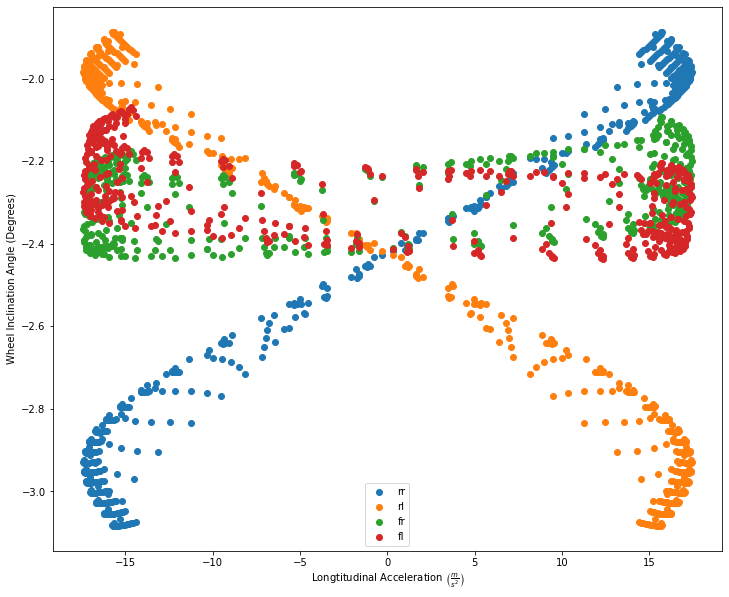

In [46]:
fig = plt.figure(figsize=(12,10))
plt.scatter(df['y_double_dot'], df['rear_right_inclination_angle'] * (180 / np.pi), label='rr')
plt.scatter(df['y_double_dot'], df['rear_left_inclination_angle'] * (180 / np.pi), label='rl')
plt.scatter(df['y_double_dot'], df['front_right_inclination_angle'] * (180 / np.pi), label='fr')
plt.scatter(df['y_double_dot'], df['front_left_inclination_angle'] * (180 / np.pi), label='fl')
plt.legend()
plt.xlabel(r'Longtitudinal Acceleration $\left(\frac{m}{s^2}\right)$')
plt.ylabel('Wheel Inclination Angle (Degrees)')
plt.show()

In [47]:
df.columns

Index(['Unnamed: 0', 'front_left_unsprung_displacement',
       'front_left_tire_centric_forces_0', 'front_left_tire_centric_forces_1',
       'front_left_tire_centric_forces_2', 'front_left_velocity_0',
       'front_left_velocity_1', 'front_left_velocity_2',
       'front_left_slip_angle', 'front_left_inclination_angle',
       'front_left_vehicle_centric_forces_0',
       'front_left_vehicle_centric_forces_1',
       'front_left_vehicle_centric_forces_2', 'front_left_moments_0',
       'front_left_moments_1', 'front_left_moments_2',
       'front_right_unsprung_displacement',
       'front_right_tire_centric_forces_0',
       'front_right_tire_centric_forces_1',
       'front_right_tire_centric_forces_2', 'front_right_velocity_0',
       'front_right_velocity_1', 'front_right_velocity_2',
       'front_right_slip_angle', 'front_right_inclination_angle',
       'front_right_vehicle_centric_forces_0',
       'front_right_vehicle_centric_forces_1',
       'front_right_vehicle_centric_f

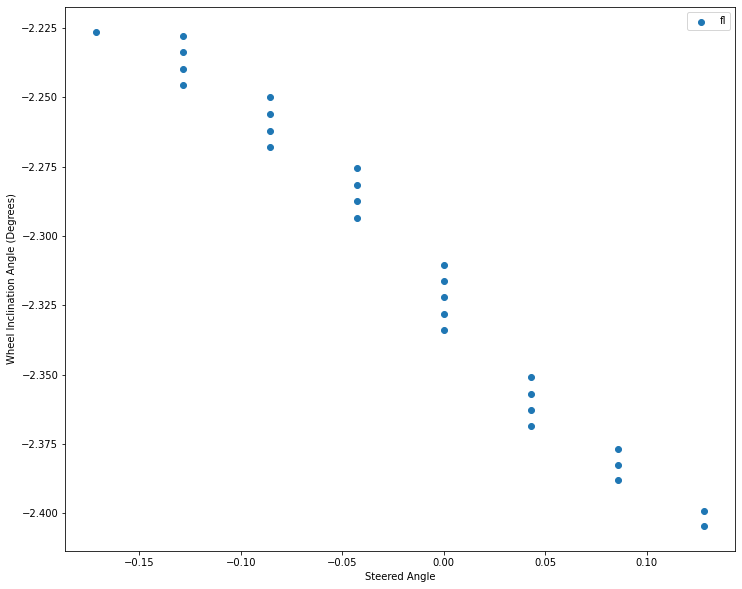

In [48]:
fig = plt.figure(figsize=(12,10))
#plt.scatter(df['steered_angle'], df['rear_right_inclination_angle'] * (180 / np.pi), label='rr')
#plt.scatter(df['steered_angle'], df['rear_left_inclination_angle'] * (180 / np.pi), label='rl')
#plt.scatter(df['steered_angle'], df['front_right_inclination_angle'] * (180 / np.pi), label='fr')
plt.scatter(df[(df['y_double_dot'] < 19) & (df['y_double_dot'] > 17)]['steered_angle'], df[(df['y_double_dot'] < 19) & (df['y_double_dot'] > 17)]['front_left_inclination_angle'] * (180 / np.pi), label='fl')
plt.legend()
plt.xlabel('Steered Angle')
plt.ylabel('Wheel Inclination Angle (Degrees)')
plt.show()

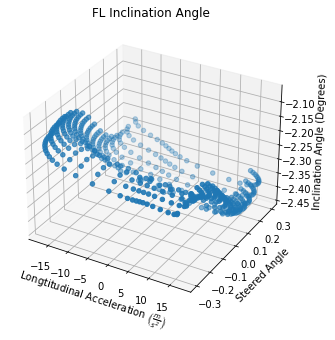

In [52]:
from mpl_toolkits.mplot3d import Axes3D

fig3 = plt.figure()
ax3 = Axes3D(fig3, auto_add_to_figure=False)
fig3.add_axes(ax3)

ax3.scatter(df['y_double_dot'], df['steered_angle'], df['front_left_inclination_angle'] * (180 / np.pi))
ax3.set(title='FL Inclination Angle', xlabel=r'Longtitudinal Acceleration $\left(\frac{m}{s^2}\right)$', ylabel='Steered Angle', zlabel='Inclination Angle (Degrees)')

plt.show()

In [50]:
#df[(df['y_double_dot'] < 1) & (df['y_double_dot'] > -1)]['y_double_dot']
df['y_double_dot']

0     -14.415488
1     -14.538682
2     -14.660837
3     -14.782046
4     -14.902420
         ...    
445    14.902473
446    14.782102
447    14.660891
448    14.538730
449    14.415525
Name: y_double_dot, Length: 450, dtype: float64